<a href="https://colab.research.google.com/github/LW068/atlas-machine_learning/blob/main/pipeline/data_augmentation/DataAugmentationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --user tensorflow-datasets


# Imports

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Flip Image

In [ ]:
def flip_image(image):
    """Flips an image horizontally"""
    return tf.image.flip_left_right(image)

Loading & Displaying Image

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete41QULO/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete41QULO/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


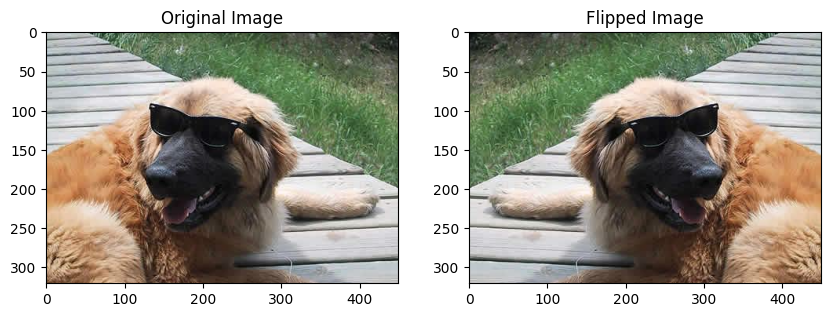

In [ ]:
tf.compat.v1.enable_eager_execution() # might nto work w this
tf.compat.v1.set_random_seed(0)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    # Display the original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    # Display the flipped image
    flipped_image = flip_image(image)
    plt.subplot(1, 2, 2)
    plt.imshow(flipped_image)
    plt.title('Flipped Image')
    plt.show()


# Crop Image

In [7]:
def crop_image(image, size):
    """Performs a random crop of an image"""
    cropped_image = tf.image.random_crop(image, size=size)
    return cropped_image

Loading & Displaying Image

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7SQJ7H/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7SQJ7H/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


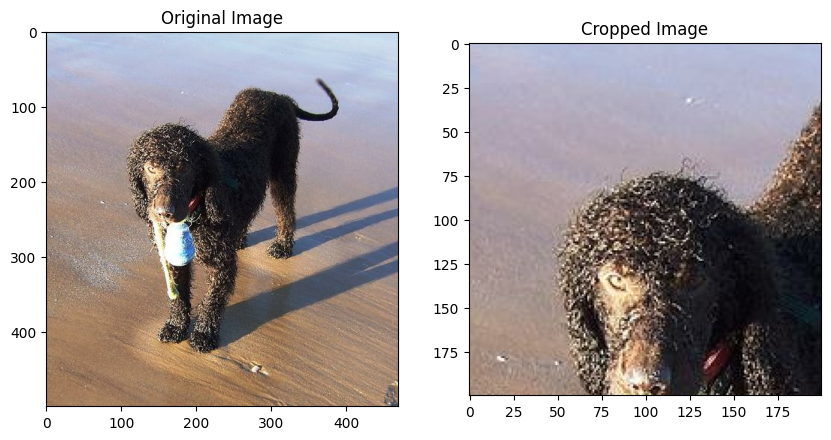

In [8]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(1)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    # Display the original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    # Crop and display the image
    cropped_image = crop_image(image, (200, 200, 3))
    plt.subplot(1, 2, 2)
    plt.imshow(cropped_image)
    plt.title('Cropped Image')
    plt.show()

# Rotate Image

In [9]:
def rotate_image(image):
    """Rotates an image by 90 degrees counter-clockwise"""
    return tf.image.rot90(image, k=1)  # k=1 means  a single 90-degree counter-clockwise rotation


Loading & Displaying Image

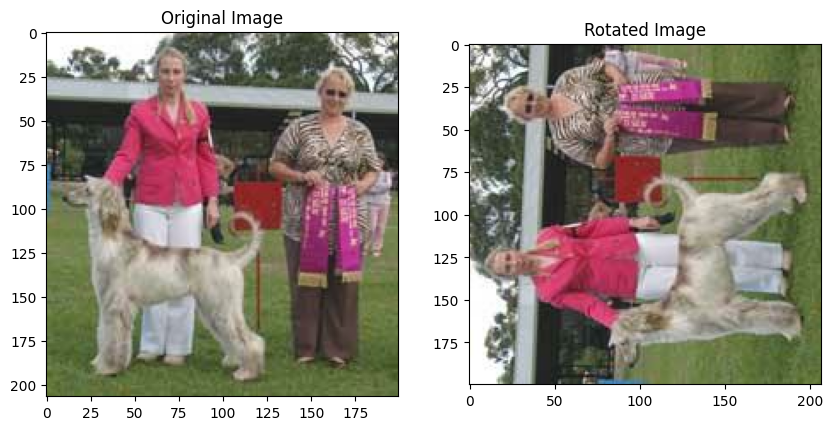

In [10]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(2)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    # Display the original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    # Rotate and display the image
    rotated_image = rotate_image(image)
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_image)
    plt.title('Rotated Image')
    plt.show()

# Shear Image

In [19]:
!pip install tensorflow-addons

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

In [30]:
def shear_image(image, intensity):
    """Randomely shears an image"""
    radians = intensity * (3.141592653589793 / 180)

    # Calculate the shear factor based on image dimensions
    height, width, _ = image.shape
    shear_factor = tf.sin(radians)

    # The matrix is flattened to a vector of length 8 for tfa.image.transform
    transformation_matrix = tf.reshape(
        [1, shear_factor, 0,  # top row
         0, 1, 0,             # middle row, no vertical shear
         0, 0                # last two elements for homogeneous coordinates
        ], shape=[8])

    # aplpying the transformation with proper format
    sheared_image = tfa.image.transform(
        images=tf.cast(image, tf.float32),  # ensuring image is float32
        transforms=transformation_matrix,
        interpolation='BILINEAR'
    )

    return sheared_image

Loading & Displaying Image

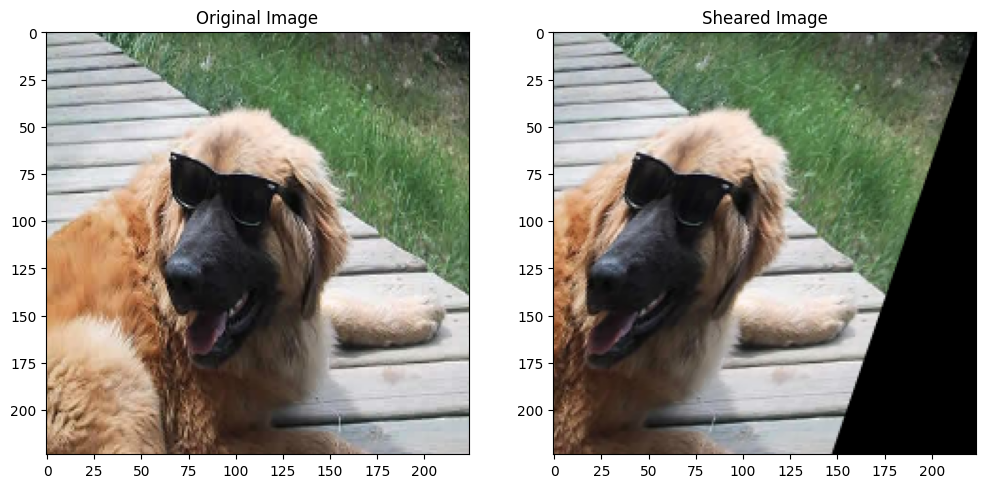

In [31]:
tf.compat.v1.enable_eager_execution()

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    image = tf.image.resize(image, (224, 224))  # Resize for demonstration

    sheared_image = shear_image(image, intensity=20)  # Applyign shearing

    # Displaying the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title('Original Image')

    # Displaying the sheared image
    plt.subplot(1, 2, 2)
    plt.imshow(sheared_image.numpy().astype("uint8"))
    plt.title('Sheared Image')
    plt.show()

# Chanage Brightness

In [34]:
def change_brightness(image, max_delta):
    """Randomly changes the brightness of an image"""
    altered_image = tf.image.random_brightness(image, max_delta=max_delta)
    return altered_image

Loading & Displaying Image:

In [35]:
tf.random.set_seed(4)

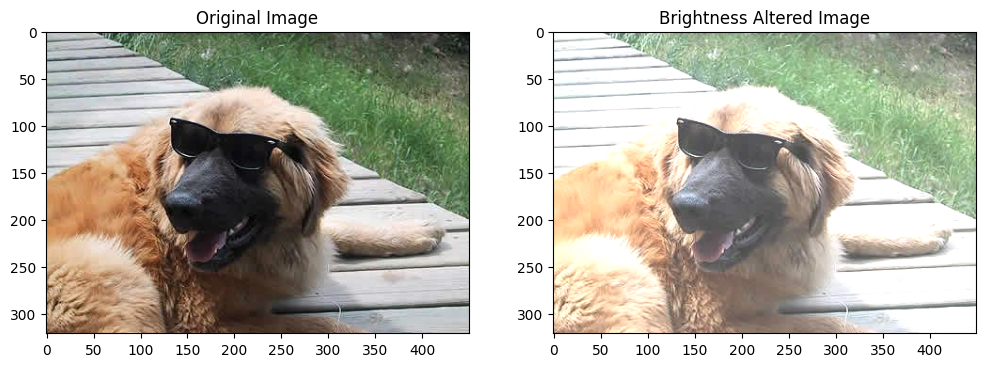

In [36]:
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    # TensorFlow operations require float32 for image adjustments
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image to [0, 1]
    altered_image = change_brightness(image, 0.3)  # Apply brightness change

    # Display the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy())
    plt.title('Original Image')

    # Display the image with adjusted brightnesss
    plt.subplot(1, 2, 2)
    plt.imshow(altered_image.numpy())
    plt.title('Brightness Altered Image')
    plt.show()

# Change HUE

In [38]:
def change_hue(image, delta):
    """Changes the hue of an image"""
    altered_image = tf.image.adjust_hue(image, delta)
    return altered_image

Loading & Displaying Image:

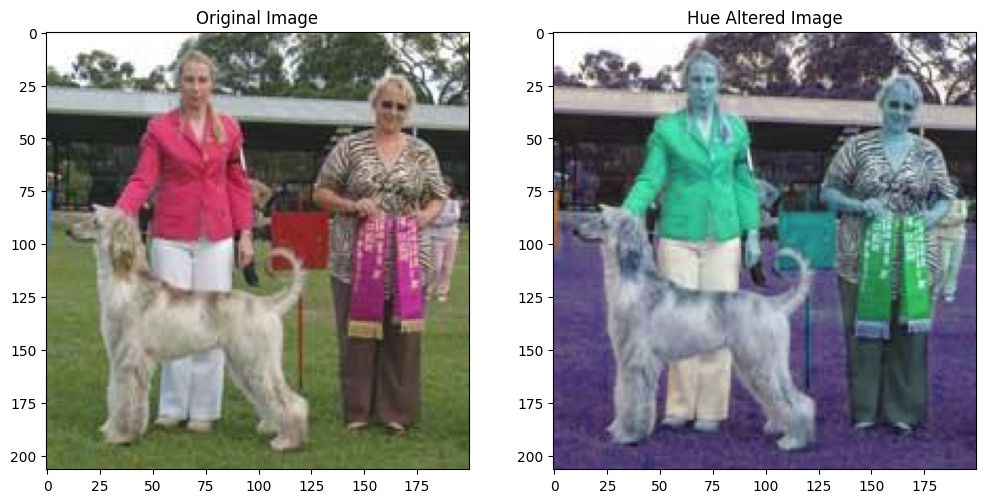

In [39]:
tf.random.set_seed(5)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    # TensorFlow operations require float32 for image adjustments
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image to [0, 1]
    altered_image = change_hue(image, -0.5)  # Apply hue change

    # Display the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy())
    plt.title('Original Image')

    # Display the image with adjusted hue
    plt.subplot(1, 2, 2)
    plt.imshow(altered_image.numpy())
    plt.title('Hue Altered Image')
    plt.show()